# Basic MNIST Tutorial based on http://neuralnetworksanddeeplearning.com/

The code below was initially copied from the public git repository referenced in the ebook above. Authorship of the original code is by Michael Nielson http://michaelnielsen.org/. I have adapted that code to stand alone in this notebook for convenience.

The notebook uses a Random Forest algorithm instead of the neural network in the original post.

That code, and the code in this IPython Notebook, is subject to the MIT License:

## License

MIT License

Copyright (c) 2012-2015 Michael Nielsen

Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files (the
"Software"), to deal in the Software without restriction, including
without limitation the rights to use, copy, modify, merge, publish,
distribute, sublicense, and/or sell copies of the Software, and to
permit persons to whom the Software is furnished to do so, subject to
the following conditions:

The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF
MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE
LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION
OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION
WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


In [1]:
"""
mnist_loader
~~~~~~~~~~~~

A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

#### Libraries
# Standard library
import cPickle
import gzip

# Third-party libraries
import numpy as np
import numpy  # Yes, it's poor practise to import into two different namespaces. 

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.

    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.

    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.

    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.

    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = cPickle.load(f)
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.

    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.

    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.

    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e


In [24]:
def reshape_matrix(data):
    """ Rehsape the data into two distinct matrices of 
    features and labels...
    """
    x, y = zip(*data)

    x = numpy.array(x)
    x = x.reshape(-1, 784)

    y = numpy.array(y)
    y = y.reshape(-1, 1)
    return x,y

In [25]:
def get_mnist_data():
    """
        Returns three tuples for training, validation and testing
        where each tuple contains two numpy arrays, one for pixels
        information, other for the labels...
    """
    training_data, validation_data, test_data = load_data_wrapper()
    train=reshape_matrix(training_data)
    validation=reshape_matrix(validation_data)
    test=reshape_matrix(test_data)
    return train,validation,test

In [4]:
%time training_data, validation_data, test_data = load_data_wrapper()

# Produces a list of 50, 000 examples. Each list entry is a tuple of
#    numpy array, shape (784, 1)
#    numpy array, shape (10,  1)

CPU times: user 1.26 s, sys: 160 ms, total: 1.42 s
Wall time: 1.91 s


In [26]:
%time train,validation,test=get_mnist_data()

CPU times: user 1.42 s, sys: 128 ms, total: 1.55 s
Wall time: 1.55 s


In [28]:
train[1].shape

(500000, 1)

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(-0.5, 27.5, 27.5, -0.5)

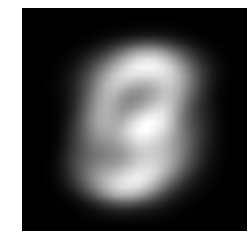

In [40]:
#printing train mean images
m=np.mean(train[0],axis=0)
plt.imshow(m.reshape(28,-1),cmap='gray')
plt.axis('off')

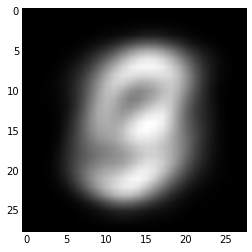

In [39]:
#printing train mean images
m=np.mean(validation[0],axis=0)
plt.imshow(m.reshape(28,-1),cmap='gray')
plt.axis('off')

In [4]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
 
    
clf = RandomForestClassifier(n_jobs=3, n_estimators=100)
%time clf.fit(x, y)
 


CPU times: user 2min 50s, sys: 1.81 s, total: 2min 52s
Wall time: 1min 2s


RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=100, n_jobs=3,
            oob_score=False, random_state=None, verbose=0)

In [5]:
p_x, p_y = zip(*test_data)


In [6]:
p_x = numpy.array(p_x)
p_x = p_x.reshape(10000, 784)

p_y = numpy.array(p_y)
p_y = p_y.reshape(10000)

In [7]:
%time preds = clf.predict(p_x)

CPU times: user 2.22 s, sys: 248 ms, total: 2.47 s
Wall time: 1.17 s


In [8]:
pred_idx = [numpy.argmax(a) for a in preds]

In [9]:
pairs = zip(pred_idx, p_y)

In [10]:
number_correct = sum([int(a == b) for a, b in pairs])

In [11]:
number_incorrect = sum([int(a != b) for a, b in pairs])

In [12]:
number_incorrect

1014

In [13]:
number_correct

8986

In [15]:
number_correct / float((number_correct + number_incorrect))

0.8986